In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math, random, requests, io
%matplotlib inline


In [2]:
import sys
!{sys.executable} -m pip install ipyleaflet
!{sys.executable} -m pip install ipywidgets

In [3]:
# Checks that the extensions have installed
!jupyter nbextension enable --py --sys-prefix ipyleaflet
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-leaflet/extension...
      - Validating: ok
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [4]:
# After importing, refresh the page to show the maps
from ipyleaflet import (
    Map, basemaps, basemap_to_tiles, Circle, 
    Marker, FullScreenControl, LayersControl, 
    LayerGroup, CircleMarker, Polyline
)

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [6]:
# https://blog.jupyter.org/interactive-gis-in-jupyter-with-ipyleaflet-52f9657fa7a
center = (0, 0)
zoom=1

map_ = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=zoom)
map_.add_control(FullScreenControl())
map_.add_control(LayersControl())
display(map_)
# If the map does not show below, then you may need to refresh the browswer and run it again

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [7]:
map_.interact(zoom=(1,10,1))

Box(children=(IntSlider(value=1, description='zoom', max=10, min=1),))

## Loading the data

In [8]:
# Needed for when editing external modules
%load_ext autoreload
%autoreload
from datasetmanager import CovidManager

covid_manager = CovidManager()

datasets = covid_manager.getDatasets()

print(datasets)

{'covid_confirmed':     Province/State         Country/Region        Lat       Long  1/22/20  \
0              NaN            Afghanistan  33.000000  65.000000        0   
1              NaN                Albania  41.153300  20.168300        0   
2              NaN                Algeria  28.033900   1.659600        0   
3              NaN                Andorra  42.506300   1.521800        0   
4              NaN                 Angola -11.202700  17.873900        0   
..             ...                    ...        ...        ...      ...   
261            NaN  Sao Tome and Principe   0.186360   6.613081        0   
262            NaN                  Yemen  15.552727  48.516388        0   
263            NaN                Comoros -11.645500  43.333300        0   
264            NaN             Tajikistan  38.861034  71.276093        0   
265            NaN                Lesotho -29.609988  28.233608        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/15/20  5/1

## Data analysis
A simple exploration of the data.

In [9]:
# Shows the dataset for deaths in the US
datasets['covid_us_deaths']

,UID,iso2,iso3,code3,FIPS,County,Province/State,Country/Region,Lat,Long,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,122,122,123,124,124,125,126,126,127,127
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,0,0,0,0,0,0,0,0,0,0
3151,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,0,0,0,0,0,0,0,0,0,0
3152,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,3,3,3,3,4,4,4,4,4,4
3153,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Dataset for the number of confirmed cases
datasets['covid_confirmed'].head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,916,933,946,948,949,964,969,981,989,998
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,761,761,761,761,762,762,762,762,762
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,48,48,48,50,52,52,58,60,61,69
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,7479,7805,8068,8371,8809,9283,9931,10649,11353,12076
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,4044,4283,4472,4823,5041,5271,5606,5928,6302,6661
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,107
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3074,3075,3076,3078,3081,3082,3084,3086,3087,3090


**Number of days since first recorded case**

In [11]:
# Outputs the number of days since the first recorded confirmed date
number_of_days = len(datasets['covid_confirmed'].count(axis='rows')) - 4
print("Number of days since first recorded confirmed case:", number_of_days)

Number of days since first recorded confirmed case: 124


**Latest Date**

The below block will find the latest date and create a dataset that only contains the current number of confirmed cases for each country + state/region

In [12]:
latest_date = datasets['covid_confirmed'].columns[-1] # number of confirmed cases to date
print("Latest date: ", latest_date)
df = datasets['covid_confirmed'].head(265)[['Country/Region', 'Province/State', 'Lat', 'Long', latest_date]]
df 

Latest date:  5/24/20


,Country/Region,Province/State,Lat,Long,5/24/20
0,Afghanistan,NaN,33.000000,65.000000,10582
1,Albania,NaN,41.153300,20.168300,998
2,Algeria,NaN,28.033900,1.659600,8306
3,Andorra,NaN,42.506300,1.521800,762
4,Angola,NaN,-11.202700,17.873900,69
...,...,...,...,...,...
260,Western Sahara,NaN,24.215500,-12.885800,9
261,Sao Tome and Principe,NaN,0.186360,6.613081,251
262,Yemen,NaN,15.552727,48.516388,222
263,Comoros,NaN,-11.645500,43.333300,87


**Confirmed cases by country sorted**

We can then show the countries ordered by the number of cases. The US has significantly more (x4 at the time) cases they Spain.

In [13]:
dfsorted = df.sort_values(latest_date, ascending=False)
dfsorted.head(20)

,Country/Region,Province/State,Lat,Long,5/24/20
225,US,NaN,37.0902,-95.7129,1643246
28,Brazil,NaN,-14.2350,-51.9253,363211
187,Russia,NaN,60.0000,90.0000,344481
223,United Kingdom,NaN,55.3781,-3.4360,259559
201,Spain,NaN,40.0000,-4.0000,235772
137,Italy,NaN,43.0000,12.0000,229858
120,Germany,NaN,51.0000,9.0000,180328
116,France,NaN,46.2276,2.2137,179859
213,Turkey,NaN,38.9637,35.2433,156827
131,India,NaN,21.0000,78.0000,138536


### Australia Data

In [14]:
# Recorded Deaths (RD)
covid_deaths_df = datasets['covid_deaths']
ausRD = covid_deaths_df[['Province/State', latest_date]].loc[covid_deaths_df['Country/Region'] == 'Australia']
ausRD

,Province/State,5/24/20
8,Australian Capital Territory,3
9,New South Wales,48
10,Northern Territory,0
11,Queensland,6
12,South Australia,4
13,Tasmania,13
14,Victoria,19
15,Western Australia,9


In [15]:
# Total number of confirmed cases in Australia
ausRD.sum(numeric_only=True)

5/24/20    102
dtype: int64

**Combined Data**

Below shows the combined datasets of Comfirmed Cases (CC), Recorded Deaths (RD), Recorded Recoveries (RR)

In [16]:
# Finding the histogram of cases in Australia, confirmed, recovered and deaths
ausCC = df.loc[df['Country/Region'] == 'Australia'] # confirmed cases
ausRR = datasets['covid_recovered'][['Province/State', latest_date]].loc[df['Country/Region'] == 'Australia'] # rec. recovery

# Rename the confirmed cases
ausCC = ausCC.rename(columns={latest_date: "CC"})
ausRD = ausRD.rename(columns={latest_date: "RD"})
ausRR = ausRR.rename(columns={latest_date: "RR"})

# Merge the tables together
ausMerged = pd.merge(ausCC, ausRD, on='Province/State')
ausMerged = pd.merge(ausMerged, ausRR, on='Province/State')
ausMerged = ausMerged.sort_values('CC')
ausMerged

,Country/Region,Province/State,Lat,Long,CC,RD,RR
2,Australia,Northern Territory,-12.4634,130.8456,29,0,29
0,Australia,Australian Capital Territory,-35.4735,149.0124,107,3,104
5,Australia,Tasmania,-41.4545,145.9707,228,13,200
4,Australia,South Australia,-34.9285,138.6007,439,4,435
7,Australia,Western Australia,-31.9505,115.8605,560,9,549
3,Australia,Queensland,-28.0167,153.4000,1056,6,1038
6,Australia,Victoria,-37.8136,144.9631,1605,19,1520
1,Australia,New South Wales,-33.8688,151.2093,3090,48,2656


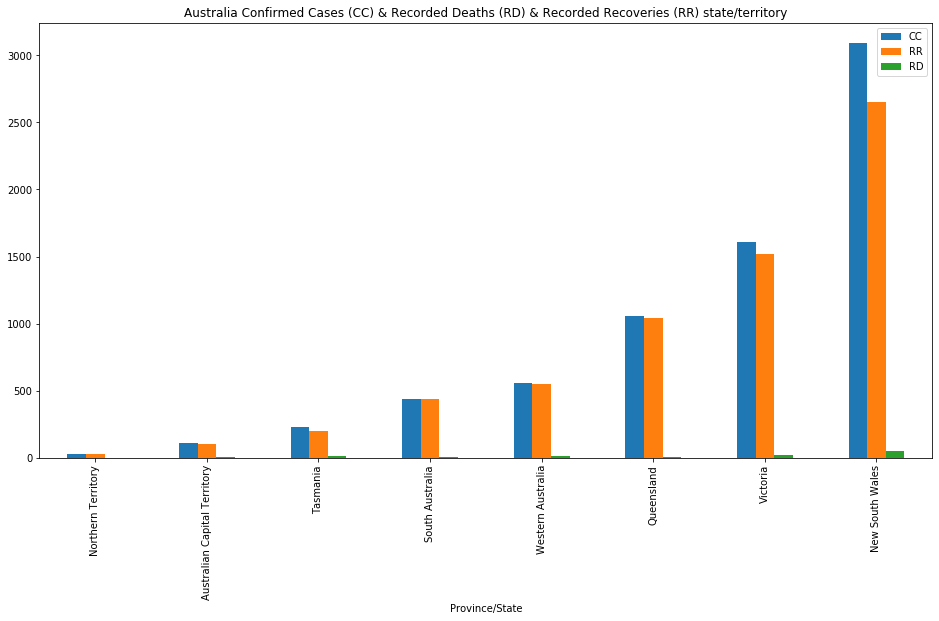

In [17]:
# Shows the bar graph for each state
title = 'Australia Confirmed Cases (CC) & Recorded Deaths (RD) & Recorded Recoveries (RR) state/territory'
ausMerged.plot.bar(x='Province/State', y=['CC', 'RR', 'RD'], figsize=(16, 8), title=title)

We can see in the above graph that NSW, Victoria and Queensland are the top 3 states. (Data may change over time)

In [18]:
datasets['covid_us_deaths']

,UID,iso2,iso3,code3,FIPS,County,Province/State,Country/Region,Lat,Long,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,122,122,123,124,124,125,126,126,127,127
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,0,0,0,0,0,0,0,0,0,0
3151,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,0,0,0,0,0,0,0,0,0,0
3152,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,3,3,3,3,4,4,4,4,4,4
3153,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,0,0,0,0,0,0,0,0,0,0


### US bar graphs
Below will do the same with the US states data

In [19]:
# Finding the histogram of cases in Australia, confirmed, recovered and deaths
usCC = datasets['covid_us_confirmed'][['Province/State', latest_date]].groupby(['Province/State']).sum() # confirmed cases
usRD = datasets['covid_us_deaths'][['Province/State', latest_date]].groupby(['Province/State']).sum() # Recorded deaths

# Rename the confirmed cases
usCC = usCC.rename(columns={latest_date: "CC"}).reset_index()
usRD = usRD.rename(columns={latest_date: "RD"}).reset_index()

# Merge the tables together
usMerged = pd.merge(usCC, usRD, on='Province/State')
usMerged = usMerged.sort_values('CC', ascending=False)
usMerged

,Province/State,CC,RD
34,New York,361515,29141
32,New Jersey,153928,11138
15,Illinois,110050,4855
5,California,94020,3754
23,Massachusetts,92367,6368
41,Pennsylvania,71563,5136
47,Texas,55861,1528
24,Michigan,51177,5160
10,Florida,50782,2237
22,Maryland,46313,2212


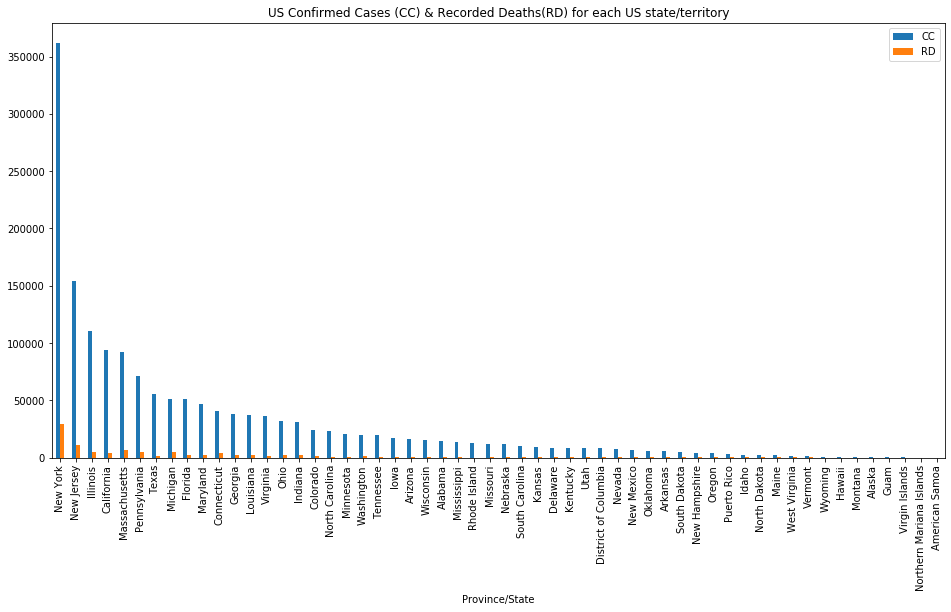

In [20]:
title = 'US Confirmed Cases (CC) & Recorded Deaths(RD) for each US state/territory'
usMerged.plot.bar(x='Province/State', y=['CC', 'RD'], figsize=(16, 8), title=title)

We can see in the above graph that New York is the recorded top number of confirmed cases. (Note that data may change over time and these are US states and not cities)

# Maps
## Generating Graph

In [21]:
# This function will generate the map with preset settings, given the map's starting coordinates (tuple) and zoom
# coords - (lat, long) of the starting coordinates, zoom - zoom of the map
def generateMap(coords, zoom):
    basemap = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=(coords), zoom=zoom)
    basemap.add_control(FullScreenControl())
    basemap.add_control(LayersControl())
    
    marker_layer = LayerGroup(name='markers')
    circle_layer = LayerGroup(name='circles')
    return basemap, marker_layer, circle_layer

In [22]:
# This function adds the data to the map, the circles and markers are added to the pymap
# df - dataframe containing the confirmed cases, pymap - map to add data and circles to, 
# G - graph to perform analysis on, scale - scale the radius of the number of cases
# mopacity - opacity of the marker (default 0)
# 
def generateMapData(df, date, coords, zoom, scale=1, mopacity=0):
    basemap, marker_layer, circle_layer = generateMap(coords, zoom)
    pos = {}
    
    for index, row in df.iterrows():
        coords = (row['Lat'], row['Long'])
        name = row['Country/Region']
        
        '''
        # Adds the state or province if the point has one
        if not pd.isnull(row['Province/State']):
            name += ' - ' + row['Province/State']
            if None != G:
                pos[name] = coords # Add to pos dict for drawing
                G.add_node(row['Province/State'], pos=coords) 
        elif None != G:
            pos[name] = coords # Add to pos dict for drawing
            G.add_node(name, pos=coords) 
        '''
            
        # Add number of cases in the title
        name += ' - Confirmed: ' + str(row[date])
        
        # Marker
        if (row[date] > 0):
            marker = Marker(location=coords, draggable=False, title=name, opacity=mopacity)
            marker_layer.add_layer(marker)
        
        # Circle
        if (row[date] > 0):
            circle = Circle(location=coords, radius=round(row[date]*scale), color='red', fill_color='red')
            circle_layer.add_layer(circle)
        
    basemap.add_layer(marker_layer)
    basemap.add_layer(circle_layer)
    return basemap

In [23]:
# Generate map for the confirmed cases
confirmedMap = generateMapData(df, latest_date, center, zoom, scale=1.2)

In [24]:
confirmedMap

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In this map you can see the dots represent the number of confirmed cases with the circle's radius representing the number of cases. The larger the circle, the higher number of cases the country/state/provice has. You can hover your mouse over the centre of a circle and it will display the country/state and number of confirmed cases.

### Australia
Below will show only Australia's Cases

In [25]:
# Create a separate dataframe for australian cities
ausCities = df.loc[df['Country/Region'] == 'Australia']
ausCities

,Country/Region,Province/State,Lat,Long,5/24/20
8,Australia,Australian Capital Territory,-35.4735,149.0124,107
9,Australia,New South Wales,-33.8688,151.2093,3090
10,Australia,Northern Territory,-12.4634,130.8456,29
11,Australia,Queensland,-28.0167,153.4000,1056
12,Australia,South Australia,-34.9285,138.6007,439
13,Australia,Tasmania,-41.4545,145.9707,228
14,Australia,Victoria,-37.8136,144.9631,1605
15,Australia,Western Australia,-31.9505,115.8605,560


In [26]:
ausCoords = (-28, 138)
ausZoom = 4
ausMap = generateMapData(ausCities, latest_date, ausCoords, ausZoom, scale=50)
ausMap

Map(center=[-28, 138], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [27]:
ausMap.interact(zoom=(1,10,1))

Box(children=(IntSlider(value=4, description='zoom', max=10, min=1),))

## Timeline
Below will show code to show the progression of cases in Australia with time.

In [28]:
df = datasets['covid_confirmed']
dfaus = df.loc[df['Country/Region'] == 'Australia']

ausMapTimeline, marker_layer_aus, circle_layer_aus = generateMap((-28, 138), 4)

In [29]:
# This function generates a graph given the dataframe, this is optimized for the timeline display
# df - dataframe containing the data, pymap - map to be given to, scale - scale of the number of cases (circle size)
# output - circle_layer - to delete this later
def generateGraphTimeline(df, pymap, date, circle_layer_aus, marker_layer_aus, showMarkers, scale=1):
    for index, row in df.iterrows():
        coords = (row['Lat'], row['Long'])
        
        # Everything to do with markers, can be selected to be off
        if showMarkers:
            name = row['Country/Region']

            # Adds the state or province if the point has one
            if not pd.isnull(row['Province/State']):
                name += ' - ' + row['Province/State']

            # Add number of cases in the title
            name += ' - Confirmed: ' + str(row[date])

            # Marker
            marker = Marker(location=coords, draggable=False, title=name, opacity=0.1)
            marker_layer_aus.add_layer(marker)
        
        # Circle
        if (row[date] > 0):
            circle = CircleMarker(location=coords, radius=round(row[date]*scale), color='red', fill_color='red')
            circle_layer_aus.add_layer(circle)
            
    pymap.add_layer(circle_layer_aus)
    if showMarkers:
        marker_layer_aus.name = 'markers'
        pymap.add_layer(marker_layer_aus)

In [30]:
def f(date, showMarkers):
    # Gets the data from the selected date
    date = dfaus.columns[date+3] # number of confirmed cases to date
    ausCities = dfaus[['Country/Region', 'Province/State', 'Lat', 'Long', date]]
    
    # Removes the old circle/marker layer
    if circle_layer_aus in ausMapTimeline.layers:
        ausMapTimeline.remove_layer(circle_layer_aus)
        circle_layer_aus.clear_layers()
    
    if marker_layer_aus in ausMapTimeline.layers:
        ausMapTimeline.remove_layer(marker_layer_aus)
        marker_layer_aus.clear_layers()
    
    # Generates and adds the new layer
    generateGraphTimeline(ausCities, ausMapTimeline, date, circle_layer_aus, marker_layer_aus, showMarkers, 0.02)

    return date

### Timeline Map

In [31]:
display(ausMapTimeline)

Map(center=[-28, 138], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [32]:
# Slider: days since first confirmed case
interact(f, date=(1, number_of_days), showMarkers=widgets.Checkbox());

interactive(children=(IntSlider(value=62, description='date', max=124, min=1), Checkbox(value=False, descripti…

Usage of map above: Move the slider to see the number of confirmed cases represented with the radius of the circle with respect to time. Move the slider to the very right to see the latest number of cases. You can select to show markers which will show the number of confirmed cases when you hover your mouse over the marker.

## US Timeline Map

In [33]:
datasets['covid_us_confirmed']

,UID,iso2,iso3,code3,FIPS,County,Province/State,Country/Region,Lat,Long,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,154,154,154,154,154,154,165,165,165,166
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,19,21,21,21,21,21,22,22,22,22
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,2542,2589,2646,2710,2805,2866,2913,3030,3100,3189
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,69,69,69,69,69,69,69,69,69,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,29,29,30,30,30,31,32,34,33,33
3151,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,13,14,14,15,16,16,17,18,18,20
3152,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,200,209,219,236,245,260,271,281,294,305
3153,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,16,19,19,22,19,20,20,21,20,20


In [34]:
dfus = datasets['covid_us_confirmed']
usCoords = (38.451217, -102.675199)
usZoom = 4
usMapTimeline, marker_layer_us, circle_layer_us = generateMap(usCoords, usZoom)

In [35]:
# This function generates a graph given the dataframe, this is optimized for the timeline display for US data
def usf(date, showMarkers):
    # Gets the data from the selected date
    date = dfus.columns[date+3] # number of confirmed cases to date
    uStates = dfus[['Province/State', 'Lat', 'Long', date]]
    
    # Removes the old circle/marker layer
    if circle_layer_us in usMapTimeline.layers:
        usMapTimeline.remove_layer(circle_layer_us)
        circle_layer_us.clear_layers()
    
    if marker_layer_us in usMapTimeline.layers:
        usMapTimeline.remove_layer(marker_layer_us)
        marker_layer_us.clear_layers()
    
    # Generates and adds the new layer
    generateGraphTimeline(uStates, usMapTimeline, date, circle_layer_us, marker_layer_us, showMarkers, 0.001)

    return date

In [36]:
display(usMapTimeline)

Map(center=[38.451217, -102.675199], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

In [37]:
# Slider: can be quite slow, click 'run Interact' to load the data
interact_manual(usf, date=(1, number_of_days), showMarkers=widgets.Checkbox());

interactive(children=(IntSlider(value=62, description='date', max=124, min=1), Checkbox(value=False, descripti…

 ## Percentage Growth of cases
 The below graphs shows the percentage changes which show the growth of cases for countries and us states. This data is date dependent and may change over time as countries implement border closures, social distancing measures and lockdowns.

In [38]:
from covid_data import CovidData
from dateutil.parser import parse

def plot_max_percent_changes(data_point, title, bin_region_column='country', country=None, limit=None, thresh=50):
    covid_data_obj = CovidData()
    data, routes = covid_data_obj.getData(bin_region_column=bin_region_column, country=country)
    
    locations = []
    max_percent_changes = []
    
    df = data[data_point].copy(deep=True)
    columns = df.columns
    dates = []
    
    for ii in range(len(columns)):
        try:
            parse(columns[ii])
            dates = columns[ii:]
            break
        except:
            pass
    
    for _index, row in df.iterrows():
        percent_changes = []
        for ii in range(len(dates)-1):
            if row[dates[ii]] < thresh:
                # Ignore small numbers, would show an artificial percent spike in change
                percent_changes.append(0)
                continue
            percent_changes.append(row[dates[ii + 1]]/row[dates[ii]])
        
        max_pc = max(percent_changes)
        # Ignore the location if there isn't sufficient data (max percent change is 0)
        if max_pc == 0: continue
            
        location_str = ""
        
        
        if bin_region_column == 'county':
            county = row['County']
            if not county == 'none':
                location_str = county
            location_str = location_str + " " + row['Province/State']
        
        if bin_region_column == 'state':
            state = row['Province/State']
            if not state == 'none':
                location_str = location_str + " " + state
                
        curr_country = row['Country/Region']
        location_str = location_str + " " + curr_country
        locations.append(location_str)
        max_percent_changes.append(max(percent_changes))
        
    new_df = pd.DataFrame({'Locations' : locations, 'Max Percent Change': max_percent_changes})
    new_df = new_df.sort_values('Max Percent Change')
    
    if not limit == None:
        new_df = new_df.tail(limit)
    
    new_df.plot.bar(x='Locations', y='Max Percent Change', figsize=(16,8), title=title)

The graph below shows the percentage growth

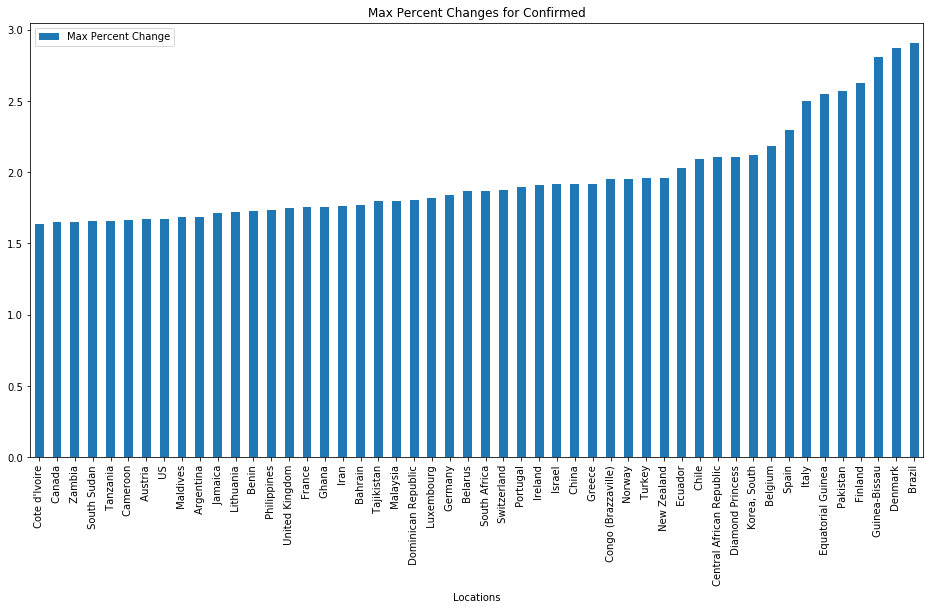

In [39]:
plot_max_percent_changes('confirmed', "Max Percent Changes for Confirmed", limit=50)

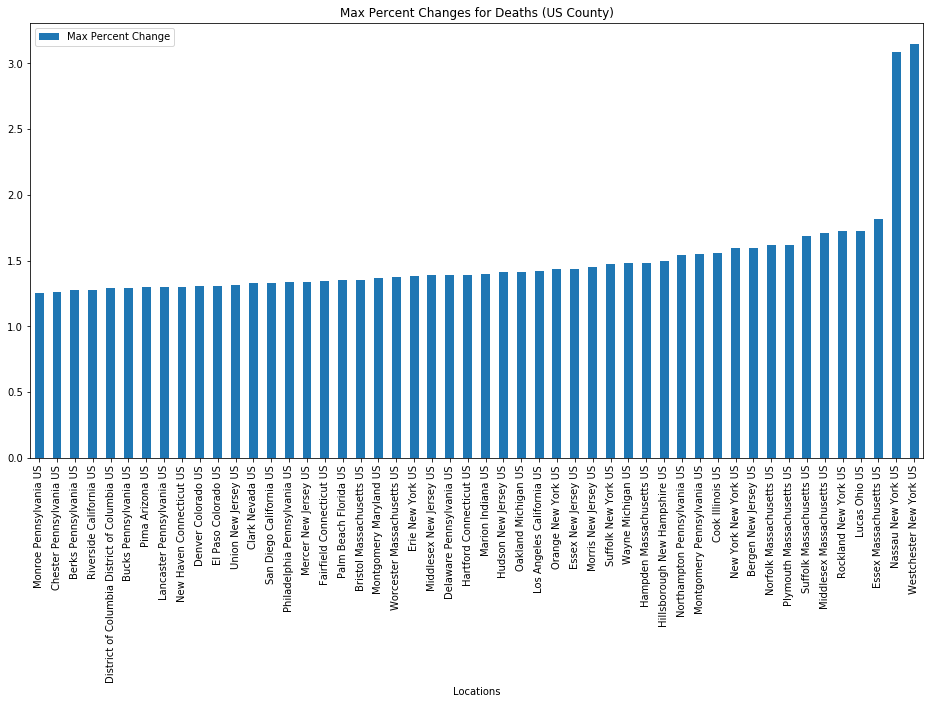

In [40]:
plot_max_percent_changes('deaths', "Max Percent Changes for Deaths (US County)", bin_region_column='county', country='US', limit=50)

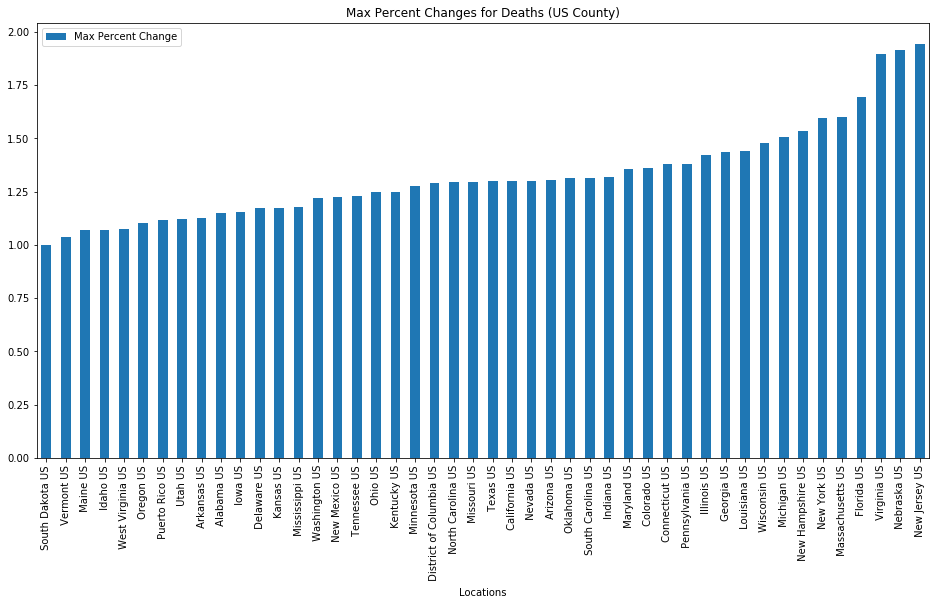

In [41]:
plot_max_percent_changes('deaths', "Max Percent Changes for Deaths (US County)", bin_region_column='state', country='US', limit=50)

# Flights Data
An Analysis of Route data from airport to airport to see if flights effect the rate of spread.

In [42]:
from covid_data import CovidData
covid_data = CovidData()

In [43]:
covid_cases_aus, ausRoutes = covid_data.getData(bin_region_column='state', country='Australia', specific_date=latest_date)

In [44]:
# Exploring the cases data, Australian states and confirmed cases from the latest date
covid_cases_aus

{'confirmed':                  Province/State Country/Region      Lat      Long  5/24/20
 0  Australian Capital Territory      Australia -35.4735  149.0124      107
 1               New South Wales      Australia -33.8688  151.2093     3090
 2            Northern Territory      Australia -12.4634  130.8456       29
 3                    Queensland      Australia -28.0167  153.4000     1056
 4               South Australia      Australia -34.9285  138.6007      439
 5                      Tasmania      Australia -41.4545  145.9707      228
 6                      Victoria      Australia -37.8136  144.9631     1605
 7             Western Australia      Australia -31.9505  115.8605      560,
 'deaths':                  Province/State Country/Region      Lat      Long  5/24/20
 0  Australian Capital Territory      Australia -35.4735  149.0124        3
 1               New South Wales      Australia -33.8688  151.2093       48
 2            Northern Territory      Australia -12.4634  130.84

In [45]:
# Cases data in a dataframe
ausCases = covid_cases_aus['confirmed']
ausCases

,Province/State,Country/Region,Lat,Long,5/24/20
0,Australian Capital Territory,Australia,-35.4735,149.0124,107
1,New South Wales,Australia,-33.8688,151.2093,3090
2,Northern Territory,Australia,-12.4634,130.8456,29
3,Queensland,Australia,-28.0167,153.4000,1056
4,South Australia,Australia,-34.9285,138.6007,439
5,Tasmania,Australia,-41.4545,145.9707,228
6,Victoria,Australia,-37.8136,144.9631,1605
7,Western Australia,Australia,-31.9505,115.8605,560


In [46]:
# Exploring the routes data, shows depart and arrival country and state, with number of routes
ausRoutes

,DepartProvince/State,DepartCountry/Region,ArrivalProvince/State,ArrivalCountry/Region,NumberOfRoutes
0,Australian Capital Territory,Australia,Australian Capital Territory,Australia,1
1,Australian Capital Territory,Australia,New South Wales,Australia,124
2,Australian Capital Territory,Australia,Queensland,Australia,23
3,Australian Capital Territory,Australia,South Australia,Australia,3
4,Australian Capital Territory,Australia,Victoria,Australia,51
5,Australian Capital Territory,Australia,Western Australia,Australia,2
6,New South Wales,Australia,Australian Capital Territory,Australia,107
7,New South Wales,Australia,New South Wales,Australia,127
8,New South Wales,Australia,Northern Territory,Australia,6
9,New South Wales,Australia,Queensland,Australia,239


In [47]:
# Gets the coordinates of the state/country given state/country
def getCoordinates(place, cases):
    df = None
    df = cases.loc[cases['Province/State'] == place]
    # If there's no state, it will just take the country coordinates
    if df.empty:
        df = cases.loc[cases['Country/Region'] == place]
    return df.iloc[0]['Lat'], df.iloc[0]['Long']

In [48]:
# Example of function usages
getCoordinates('Tasmania', ausCases)

(-41.4545, 145.9707)

In [49]:
# Generates the line layer for the routes
def generateRoutes(routes, cases, Graph=None, showOpacity=True, opacity=0.2):
    locations = []
    maxRoute = max(routes['NumberOfRoutes']) # Route with most flights, for calculating opacity
    line_layer = LayerGroup(name='Lines')

    for index, row in routes.iterrows():

        # higher opacity means higher freqency route (on my default)
        if showOpacity:
            opacity = row[4]/maxRoute
        
        # If its a state, the dept & ariv are the state, otherwise its the country
        if row[0] != 'none':
            dept = row[0]
        else:
            dept = row[1]
            
        if row[2] != 'none':
            ariv = row[2]
        else:
            ariv = row[3]
        
        # Add line that represents the route
        line = Polyline(locations=[getCoordinates(dept, cases), getCoordinates(ariv, cases)], color='blue', opacity=opacity)
        line_layer.add_layer(line)
        
        # Add edge to the graph
        if Graph != None:
            Graph.add_edge(row[0], row[2], weight=row[4])
    
    return line_layer

## Map of Australia with routes data

In [50]:
# Generate the Map
ausMapFlights = generateMapData(ausCities, latest_date, ausCoords, ausZoom, scale=50)

In [51]:
# Adds the routes layer to the map
ausMapFlights.add_layer(generateRoutes(ausRoutes, ausCases))

In [52]:
ausMapFlights

Map(center=[-28, 138], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

## Map of US with flights

In [53]:
covid_cases_us, usRoutes = covid_data.getData(bin_region_column='state', country='US', specific_date=latest_date)
usCases = covid_cases_us['confirmed']
usCases

,Province/State,Country/Region,Lat,Long,5/24/20
0,Alabama,US,32.884280,-86.710122,14478
1,Alaska,US,60.261375,-145.838598,407
2,American Samoa,US,-14.271000,-170.132000,0
3,Arizona,US,33.675904,-111.463232,16377
4,Arkansas,US,34.911889,-92.433978,5772
5,California,US,37.843962,-120.728594,94020
6,Colorado,US,38.935474,-105.486240,24049
7,Connecticut,US,41.613680,-72.656830,40258
8,Delaware,US,39.109277,-75.533237,8752
9,District of Columbia,US,38.904178,-77.016560,8110


In [54]:
# Generate the Map
usMapFlights = generateMapData(ausCities, latest_date, usCoords, usZoom, scale=4)

In [55]:
# May take some time to load
usMapFlights.add_layer(generateRoutes(usRoutes, usCases))

In [56]:
usMapFlights

Map(center=[38.451217, -102.675199], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

# Incoming routes to Australia

In [57]:
# Routes to and from each city in Australia
covid_cases, allRoutes = covid_data.getData(bin_region_column='state')

In [58]:
# Exploring the data

In [59]:
# Get all the incoming routes to Australia
incAusRoutes = allRoutes.loc[allRoutes['ArrivalCountry/Region'] == 'Australia']

# This will combine the Country and the state
incAusRoutesC = incAusRoutes.copy()
incAusRoutesC['Depart'] = incAusRoutes['DepartProvince/State'] + '-' + incAusRoutes['DepartCountry/Region']
incAusRoutesC['Arrival'] = incAusRoutes['ArrivalProvince/State'] + '-' + incAusRoutes['ArrivalCountry/Region']

# removes the unwanted 'none' strings when entries don't have states/provinces
incAusRoutesC['Depart'] = incAusRoutesC['Depart'].map(lambda x: x.lstrip('-none'))
incAusRoutesC['Arrival'] = incAusRoutesC['Arrival'].map(lambda x: x.lstrip('-none'))

In [60]:
# Seperates depart state and country and remove dups
depAusRoutes = incAusRoutes[['DepartProvince/State', 'DepartCountry/Region']].drop_duplicates()

In [61]:
# Gets the lat and long and confirmed cases from the covid cases data
incAusCities = pd.merge(depAusRoutes, covid_cases['confirmed'], how='left'
                        , left_on=['DepartProvince/State','DepartCountry/Region']
                        , right_on = ['Province/State','Country/Region'])
# Combine the DepartProvince/State and DepartCountry/Region
incAusCities

,DepartProvince/State,DepartCountry/Region,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20
0,Australian Capital Territory,Australia,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,...,107,107,107,107,107,107,107,107,107,107
1,Beijing,China,Beijing,China,40.182400,116.414200,14,22,36,41,...,593,593,593,593,593,593,593,593,593,593
2,British Columbia,Canada,British Columbia,Canada,49.282700,-123.120700,0,0,0,0,...,2407,2428,2428,2444,2446,2467,2479,2507,2517,2517
3,California,US,California,US,37.843962,-120.728594,0,0,0,0,...,76693,78725,80166,81457,83752,85997,88031,90252,92539,94020
4,Chongqing,China,Chongqing,China,30.057200,107.874000,6,9,27,57,...,579,579,579,579,579,579,579,579,579,579
5,French Polynesia,France,French Polynesia,France,-17.679700,149.406800,0,0,0,0,...,60,60,60,60,60,60,60,60,60,60
6,Fujian,China,Fujian,China,26.078900,117.987400,1,5,10,18,...,356,356,356,356,356,356,356,356,356,356
7,Guangdong,China,Guangdong,China,23.341700,113.424400,26,32,53,78,...,1589,1590,1590,1590,1590,1590,1590,1591,1592,1592
8,Hainan,China,Hainan,China,19.195900,109.745300,4,5,8,19,...,169,169,169,169,169,169,169,169,169,169
9,Hawaii,US,Hawaii,US,21.028283,-157.323236,0,0,0,0,...,628,629,630,630,631,633,637,632,633,633


Above shows the combination of the routes data and the number of confirmed cases into one dataframe

In [62]:
# Generates the line layer for the routes (changed to work with combined country + state)
def generateRoutesCombined(routes, cases, graph=None, showOpacity=True, opacity=0.2):
    locations = []
    maxRoute = max(routes['NumberOfRoutes']) # Route with most flights, for calculating opacity
    line_layer = LayerGroup(name='Lines')
    
    for index, row in routes.iterrows():

        # higher opacity means higher freqency route (on my default)
        if showOpacity:
            opacity = row[4]/maxRoute
        
        # If its a state, the dept & ariv are the state, otherwise its the country
        if row[0] != 'none':
            dept = row[0]
        else:
            dept = row[1]
            
        if row[2] != 'none':
            ariv = row[2]
        else:
            ariv = row[3]
        
        # Add line that represents the route
        line = Polyline(locations=[getCoordinates(dept, cases), getCoordinates(ariv, cases)], color='blue', opacity=opacity)
        line_layer.add_layer(line)
        
        # Add edge to the graph
        if graph != None:
            graph.add_edge(row[5], row[6], weight=maxRoute-row[4]+1)
    
    return line_layer

In [63]:
# Generate the Map
incAusMapFlights, marker_layer_incAus_flights, circle_layer_incAus_flights = generateMap(ausCoords, 2)

In [64]:
# May take some time to load
incAusGraphFlights = nx.Graph()
incAusMapFlights.add_layer(generateRoutesCombined(incAusRoutesC, incAusCities, incAusGraphFlights, showOpacity=False, opacity=0.1))

In [65]:
def flightsf(date, showMarkers):
    # Gets the data from the selected date
    date = dfaus.columns[date+3] # number of confirmed cases to date
    ausCities = dfaus[['Country/Region', 'Province/State', 'Lat', 'Long', date]]
    
    # Removes the old circle/marker layer
    if circle_layer_incAus_flights in incAusMapFlights.layers:
        incAusMapFlights.remove_layer(circle_layer_incAus_flights)
        circle_layer_incAus_flights.clear_layers()
    
    if marker_layer_incAus_flights in incAusMapFlights.layers:
        incAusMapFlights.remove_layer(marker_layer_incAus_flights)
        marker_layer_incAus_flights.clear_layers()
    
    # Generates and adds the new layer
    generateGraphTimeline(incAusCities, incAusMapFlights, date, 
                          circle_layer_incAus_flights, marker_layer_incAus_flights, showMarkers, 0.001)

    return date

In [66]:
incAusMapFlights

Map(center=[-28, 138], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [67]:
# Slider: days since first confirmed case
interact(flightsf, date=(1, number_of_days), showMarkers=widgets.Checkbox());

interactive(children=(IntSlider(value=62, description='date', max=124, min=1), Checkbox(value=False, descripti…

The Map above is useful for finding which routes most likely contributed the spread of the virus to Australia. For example, 31 Jan, '1/31/20' (10) you can see, New South Walkes, Victoria, and Queensland show infected cases and have lots of routes coming from infected areas.

In [68]:
# Number of locations in the graph
len(incAusGraphFlights.nodes())

49

In [69]:
# Number of edges in the graph
len(incAusGraphFlights.edges())

143

# Border Closures
Below we are going to investiage the effectiveness of the border closures in Australia for the months of Februrary, March, April, May and use degree distribution to determine the level of rubustness in the network as these closures are added.

### Initial flights 31 January 2020

In [70]:
# Creates the map and graph using the routes and node data (including confirmed cases)
def renderMap(routes, nodes, latest_date, coords, zoom, showOpacity=False, scale=0.001):
    incAusMapFlights, circles_incAus_flights, markers_incAus_flights = generateMap(coords, zoom)
    incAusGraphFlights = nx.Graph()
    incAusMapFlights.add_layer(generateRoutesCombined(routes, nodes, incAusGraphFlights, showOpacity=showOpacity))
    generateGraphTimeline(nodes, incAusMapFlights, latest_date, 
                              circles_incAus_flights, markers_incAus_flights, True, scale)
    return incAusMapFlights, incAusGraphFlights

In [71]:
incAusMapFlights1, incAusGraphFlights1 = renderMap(incAusRoutesC, incAusCities, '1/31/20', (-28,138), 2)

In [72]:
incAusMapFlights1

Map(center=[-28, 138], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

### Graph analysis

In [73]:
# We can find the number of routes for each state
def getNumRoutes(routes):
    return routes[['Arrival', 'NumberOfRoutes']].groupby(['Arrival']).sum().sort_values(by='NumberOfRoutes', ascending=False)

In [74]:
# Prints the number of routes
getNumRoutes(incAusRoutesC)

,NumberOfRoutes
Arrival,
Queensland-Australia,1063
New South Wales-Australia,917
Victoria-Australia,615
Western Australia-Australia,460
South Australia-Australia,242
Australian Capital Territory-Australia,175
Northern Territory-Australia,153
Tasmania-Australia,89


**Degree distribution**

Degree distribution tells us which nodes is connected to the most routes. We can use this to find which state is has the most distinct incoming traffic.

In [75]:
# Calculates the degree distribution for the nodes
degrees = nx.degree_centrality(incAusGraphFlights1)
degrees

{'Australian Capital Territory-Australia': 0.14583333333333331,
 'New South Wales-Australia': 0.9375,
 'Queensland-Australia': 0.6041666666666666,
 'South Australia-Australia': 0.35416666666666663,
 'Victoria-Australia': 0.7916666666666666,
 'Western Australia-Australia': 0.41666666666666663,
 'Beijing-China': 0.041666666666666664,
 'British Columbia-Canada': 0.0625,
 'California-US': 0.0625,
 'Chongqing-China': 0.041666666666666664,
 'French Polynesia-France': 0.020833333333333332,
 'Fujian-China': 0.041666666666666664,
 'Guangdong-China': 0.10416666666666666,
 'Hainan-China': 0.020833333333333332,
 'Hawaii-US': 0.0625,
 'Henan-China': 0.020833333333333332,
 'Hong Kong-China': 0.10416666666666666,
 'Hubei-China': 0.020833333333333332,
 'Hunan-China': 0.041666666666666664,
 'Jiangsu-China': 0.020833333333333332,
 'New Caledonia-France': 0.0625,
 'Northern Territory-Australia': 0.2708333333333333,
 'Tasmania-Australia': 0.125,
 'Shaanxi-China': 0.041666666666666664,
 'Shandong-China': 0

In [76]:
# Converts results from above into a pandas dataframe and print out only Australian cities
def dictToDataframe(degrees):
    dfdegrees = pd.DataFrame.from_dict(degrees, orient='index', columns=['Degrees'])
    dfdegrees.reset_index(level=0, inplace=True) # key indexs to seperate column
    dfdegrees = dfdegrees.loc[dfdegrees['index'].str.contains('Australia')] # get only australia
    dfdegrees = dfdegrees.sort_values(by='Degrees', ascending=False) # sort by degrees
    dfdegrees = dfdegrees.reset_index(drop=True) # fix indexing
    return dfdegrees

In [77]:
# Outputs the degree distribution
dfdegrees1 = dictToDataframe(degrees)
dfdegrees1

,index,Degrees
0,New South Wales-Australia,0.937500
1,Victoria-Australia,0.791667
2,Queensland-Australia,0.604167
3,Western Australia-Australia,0.416667
4,South Australia-Australia,0.354167
5,Northern Territory-Australia,0.270833
6,Australian Capital Territory-Australia,0.145833
7,Tasmania-Australia,0.125000


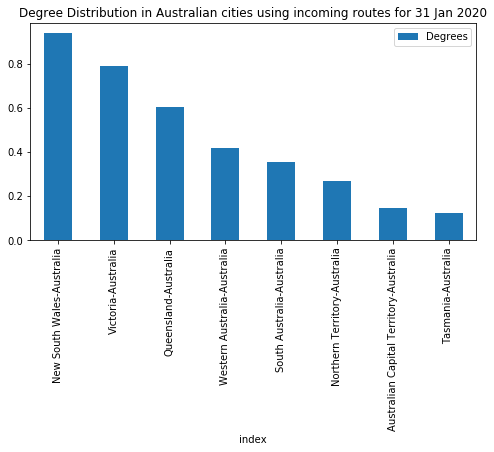

In [78]:
# Shows the bar graph for each state
title = 'Degree Distribution in Australian cities using incoming routes for 31 Jan 2020'
dfdegrees1.plot.bar(x='index', y=['Degrees'], figsize=(8, 4), title=title)

**Closeness**

However, the degree distribution doesn't account for the frequency of flights so a closeness centrality can be used to identify the nodes closer to all other nodes which are the biggest airport hubs in the network.

As the frequency of the routes was the weight, the inverse weight had to be used by using the max distance and subtracting it from the weight with adding one (so no 0 weights). Therefore, the closest values with the most frequent routes would have a low weight number, and the least frequent routes would have a higher weight value as if distance was further.

In [79]:
closeness1 = nx.closeness_centrality(incAusGraphFlights1, distance='weight')
dfcloseness1 = dictToDataframe(closeness1)
dfcloseness1

,index,Degrees
0,New South Wales-Australia,0.002038
1,Victoria-Australia,0.001842
2,Queensland-Australia,0.001776
3,Western Australia-Australia,0.001358
4,South Australia-Australia,0.001329
5,Northern Territory-Australia,0.001250
6,Australian Capital Territory-Australia,0.001249
7,Tasmania-Australia,0.001151


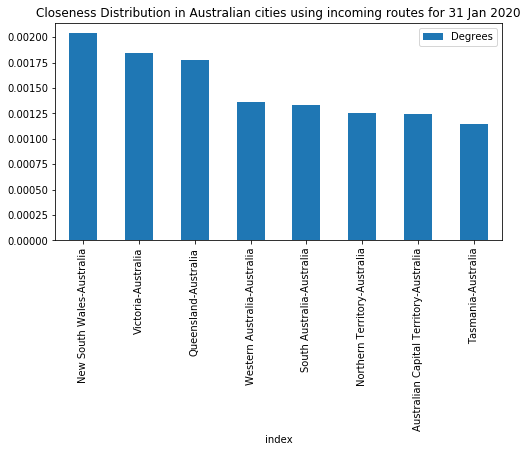

In [80]:
# Shows the bar graph for each state
title = 'Closeness Distribution in Australian cities using incoming routes for 31 Jan 2020'
dfcloseness1.plot.bar(x='index', y=['Degrees'], figsize=(8, 4), title=title)

The bar graph above shows that NSW, Victoria and Queensland have the top 3 highest closeness distribution showing they are the major hubs in Australia.

## Australia closes borders with China 1 Feb 2020

In [81]:
# Remove flights from china
incAusRoutes2 = incAusRoutesC.loc[incAusRoutesC['DepartCountry/Region'] != 'China']

In [82]:
incAusMapFlights2, incAusGraphFlights2 = renderMap(incAusRoutes2, incAusCities, '2/1/20', (-28,138), 2)
incAusMapFlights2

Map(center=[-28, 138], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [83]:
# Calculates the degree distribution for the nodes
degrees2 = nx.degree_centrality(incAusGraphFlights2)
degrees2

{'Australian Capital Territory-Australia': 0.21212121212121213,
 'New South Wales-Australia': 0.9393939393939394,
 'Queensland-Australia': 0.7575757575757576,
 'South Australia-Australia': 0.4545454545454546,
 'Victoria-Australia': 0.8181818181818182,
 'Western Australia-Australia': 0.5454545454545454,
 'British Columbia-Canada': 0.09090909090909091,
 'California-US': 0.09090909090909091,
 'French Polynesia-France': 0.030303030303030304,
 'Hawaii-US': 0.09090909090909091,
 'New Caledonia-France': 0.09090909090909091,
 'Northern Territory-Australia': 0.3939393939393939,
 'Tasmania-Australia': 0.18181818181818182,
 'Texas-US': 0.030303030303030304,
 'Brunei': 0.030303030303030304,
 'Chile': 0.030303030303030304,
 'Fiji': 0.09090909090909091,
 'India': 0.06060606060606061,
 'Indonesia': 0.18181818181818182,
 'Japan': 0.12121212121212122,
 'Korea, South': 0.06060606060606061,
 'Malaysia': 0.18181818181818182,
 'Mauritius': 0.030303030303030304,
 'New Zealand': 0.18181818181818182,
 'Papua 

In [84]:
dfdegrees2 = dictToDataframe(degrees2)
dfdegrees2

,index,Degrees
0,New South Wales-Australia,0.939394
1,Victoria-Australia,0.818182
2,Queensland-Australia,0.757576
3,Western Australia-Australia,0.545455
4,South Australia-Australia,0.454545
5,Northern Territory-Australia,0.393939
6,Australian Capital Territory-Australia,0.212121
7,Tasmania-Australia,0.181818


In [85]:
closeness2 = nx.closeness_centrality(incAusGraphFlights2, distance='weight')
dfcloseness2 = dictToDataframe(closeness2)
dfcloseness2

,index,Degrees
0,New South Wales-Australia,0.002018
1,Queensland-Australia,0.001862
2,Victoria-Australia,0.001857
3,Western Australia-Australia,0.001456
4,South Australia-Australia,0.001395
5,Northern Territory-Australia,0.001336
6,Australian Capital Territory-Australia,0.001272
7,Tasmania-Australia,0.001165


## Australia closes borders with Iran and South Korea
Iran: 1 March 2020, South Korea: 5 March 2020

In [86]:
# Remove flights from Iran and South Korea
incAusRoutes3 = incAusRoutes2.loc[incAusRoutesC['DepartCountry/Region'] != 'Iran']
incAusRoutes3 = incAusRoutes3.loc[incAusRoutesC['DepartCountry/Region'] != 'Korea, South']

In [87]:
incAusMapFlights3, incAusGraphFlights3 = renderMap(incAusRoutes3, incAusCities, '3/5/20', (-28,138), 2)
incAusMapFlights3

Map(center=[-28, 138], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [88]:
# Calculates the degree distribution for the nodes
degrees3 = nx.degree_centrality(incAusGraphFlights3)
degrees3

{'Australian Capital Territory-Australia': 0.21875,
 'New South Wales-Australia': 0.9375,
 'Queensland-Australia': 0.75,
 'South Australia-Australia': 0.46875,
 'Victoria-Australia': 0.84375,
 'Western Australia-Australia': 0.5625,
 'British Columbia-Canada': 0.09375,
 'California-US': 0.09375,
 'French Polynesia-France': 0.03125,
 'Hawaii-US': 0.09375,
 'New Caledonia-France': 0.09375,
 'Northern Territory-Australia': 0.40625,
 'Tasmania-Australia': 0.1875,
 'Texas-US': 0.03125,
 'Brunei': 0.03125,
 'Chile': 0.03125,
 'Fiji': 0.09375,
 'India': 0.0625,
 'Indonesia': 0.1875,
 'Japan': 0.125,
 'Malaysia': 0.1875,
 'Mauritius': 0.03125,
 'New Zealand': 0.1875,
 'Papua New Guinea': 0.0625,
 'Philippines': 0.09375,
 'Qatar': 0.125,
 'Singapore': 0.1875,
 'South Africa': 0.0625,
 'Taiwan*': 0.09375,
 'Thailand': 0.125,
 'Timor-Leste': 0.03125,
 'United Arab Emirates': 0.15625,
 'Vietnam': 0.0625}

In [89]:
dfdegrees3 = dictToDataframe(degrees3)
dfdegrees3

,index,Degrees
0,New South Wales-Australia,0.93750
1,Victoria-Australia,0.84375
2,Queensland-Australia,0.75000
3,Western Australia-Australia,0.56250
4,South Australia-Australia,0.46875
5,Northern Territory-Australia,0.40625
6,Australian Capital Territory-Australia,0.21875
7,Tasmania-Australia,0.18750


In [90]:
closeness3 = nx.closeness_centrality(incAusGraphFlights3, distance='weight')
dfcloseness3 = dictToDataframe(closeness3)
dfcloseness3

,index,Degrees
0,New South Wales-Australia,0.002014
1,Victoria-Australia,0.001884
2,Queensland-Australia,0.001854
3,Western Australia-Australia,0.001471
4,South Australia-Australia,0.001407
5,Northern Territory-Australia,0.001344
6,Australian Capital Territory-Australia,0.001274
7,Tasmania-Australia,0.001168


## Australia closes all borders 20 March 2020


In [91]:
# Remove all international flights
incAusRoutes4 = incAusRoutes3.loc[incAusRoutesC['DepartCountry/Region'] == 'Australia']

In [92]:
incAusMapFlights4, incAusGraphFlights4 = renderMap(incAusRoutes4, incAusCities, '3/20/20', (-28,138), 2)
incAusMapFlights4

Map(center=[-28, 138], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [93]:
# Calculates the degree distribution for the nodes
degrees4 = nx.degree_centrality(incAusGraphFlights4)
degrees4

{'Australian Capital Territory-Australia': 1.0,
 'New South Wales-Australia': 1.2857142857142856,
 'Queensland-Australia': 1.2857142857142856,
 'South Australia-Australia': 1.1428571428571428,
 'Victoria-Australia': 1.2857142857142856,
 'Western Australia-Australia': 1.2857142857142856,
 'Northern Territory-Australia': 1.0,
 'Tasmania-Australia': 0.8571428571428571}

In [94]:
dfdegrees4 = dictToDataframe(degrees4)
dfdegrees4

,index,Degrees
0,New South Wales-Australia,1.285714
1,Queensland-Australia,1.285714
2,Victoria-Australia,1.285714
3,Western Australia-Australia,1.285714
4,South Australia-Australia,1.142857
5,Australian Capital Territory-Australia,1.000000
6,Northern Territory-Australia,1.000000
7,Tasmania-Australia,0.857143


In [95]:
closeness4 = nx.closeness_centrality(incAusGraphFlights4, distance='weight')
dfcloseness4 = dictToDataframe(closeness4)
dfcloseness4

,index,Degrees
0,New South Wales-Australia,0.002612
1,Queensland-Australia,0.002533
2,Victoria-Australia,0.002487
3,Western Australia-Australia,0.002219
4,South Australia-Australia,0.001999
5,Australian Capital Territory-Australia,0.001841
6,Northern Territory-Australia,0.001777
7,Tasmania-Australia,0.001623


## Combining the data

In [96]:
# Rename the confirmed cases
dfdegrees1 = dfdegrees1.rename(columns={'Degrees': "31 Jan"})
dfdegrees2 = dfdegrees2.rename(columns={'Degrees': "1  Feb"})
dfdegrees3 = dfdegrees3.rename(columns={'Degrees': "5  Mar"})
dfdegrees4 = dfdegrees4.rename(columns={'Degrees': "20 Mar"})

# Combination of all the graphs
dfdegreesAll = pd.merge(dfdegrees1, dfdegrees2, on='index')
dfdegreesAll = pd.merge(dfdegreesAll, dfdegrees3, on='index')
dfdegreesAll = pd.merge(dfdegreesAll, dfdegrees4, on='index')
dfdegreesAll

,index,31 Jan,1 Feb,5 Mar,20 Mar
0,New South Wales-Australia,0.937500,0.939394,0.93750,1.285714
1,Victoria-Australia,0.791667,0.818182,0.84375,1.285714
2,Queensland-Australia,0.604167,0.757576,0.75000,1.285714
3,Western Australia-Australia,0.416667,0.545455,0.56250,1.285714
4,South Australia-Australia,0.354167,0.454545,0.46875,1.142857
5,Northern Territory-Australia,0.270833,0.393939,0.40625,1.000000
6,Australian Capital Territory-Australia,0.145833,0.212121,0.21875,1.000000
7,Tasmania-Australia,0.125000,0.181818,0.18750,0.857143


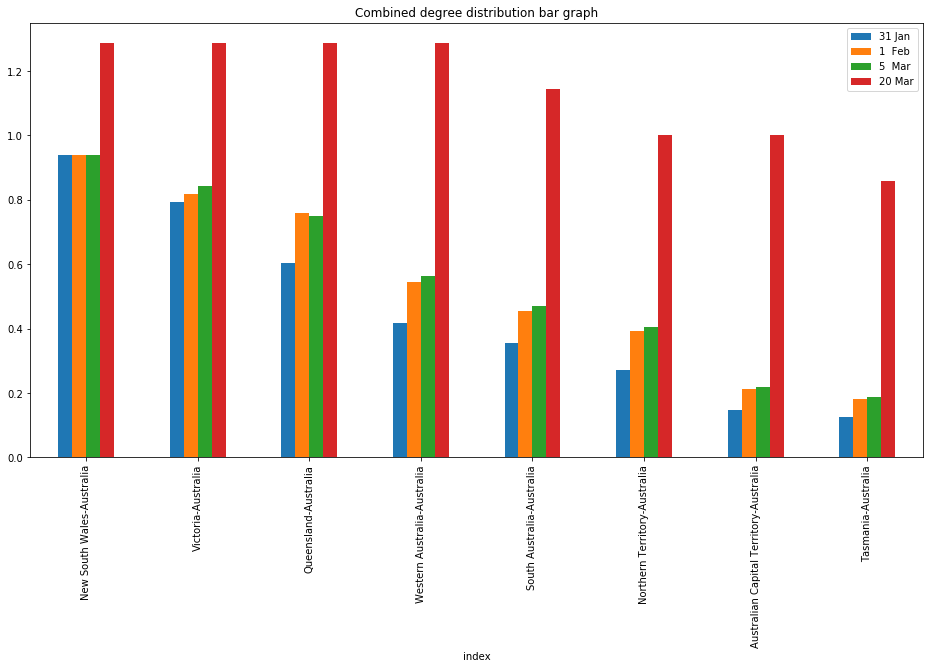

In [97]:
# Shows the bar graph for each state
title = 'Combined degree distribution bar graph'
dfdegreesAll.plot.bar(x='index', y=['31 Jan', '1  Feb', '5  Mar', '20 Mar'], figsize=(16, 8), title=title)

As expected as nodes are removed from the graph, nsw is still the most connected but the other states become more connected as there are less nodes in the graph.

As seen in the above graph, the bar graph in NSW is the highest and also changes the slowest as more borders are closed which shows that NSW is the main hub in Australia with Victoria as the second. These hubs mean its suspected to have higher infection rates which is true as seen in the below graph.


In [98]:
# Rename the confirmed cases
dfcloseness1 = dfcloseness1.rename(columns={'Degrees': "31 Jan"})
dfcloseness2 = dfcloseness2.rename(columns={'Degrees': "1  Feb"})
dfcloseness3 = dfcloseness3.rename(columns={'Degrees': "5  Mar"})
dfcloseness4 = dfcloseness4.rename(columns={'Degrees': "20 Mar"})

# Combination of all the graphs
dfclosenessAll = pd.merge(dfcloseness1, dfcloseness2, on='index')
dfclosenessAll = pd.merge(dfclosenessAll, dfcloseness3, on='index')
dfclosenessAll = pd.merge(dfclosenessAll, dfcloseness4, on='index')
dfclosenessAll

,index,31 Jan,1 Feb,5 Mar,20 Mar
0,New South Wales-Australia,0.002038,0.002018,0.002014,0.002612
1,Victoria-Australia,0.001842,0.001857,0.001884,0.002487
2,Queensland-Australia,0.001776,0.001862,0.001854,0.002533
3,Western Australia-Australia,0.001358,0.001456,0.001471,0.002219
4,South Australia-Australia,0.001329,0.001395,0.001407,0.001999
5,Northern Territory-Australia,0.001250,0.001336,0.001344,0.001777
6,Australian Capital Territory-Australia,0.001249,0.001272,0.001274,0.001841
7,Tasmania-Australia,0.001151,0.001165,0.001168,0.001623


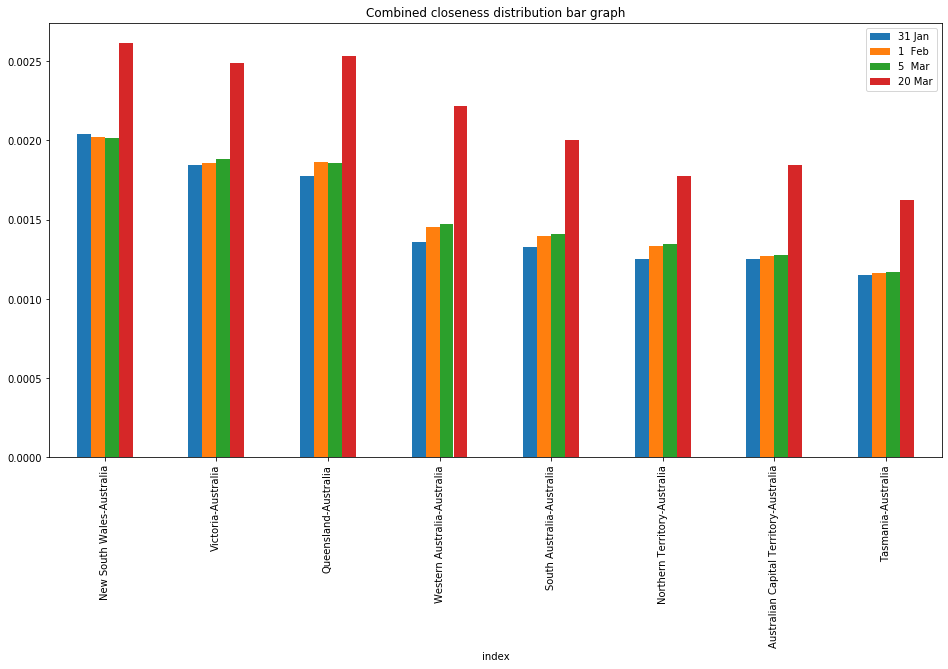

In [99]:
# Shows the bar graph for each state
title = 'Combined closeness distribution bar graph'
dfclosenessAll.plot.bar(x='index', y=['31 Jan', '1  Feb', '5  Mar', '20 Mar'], figsize=(16, 8), title=title)

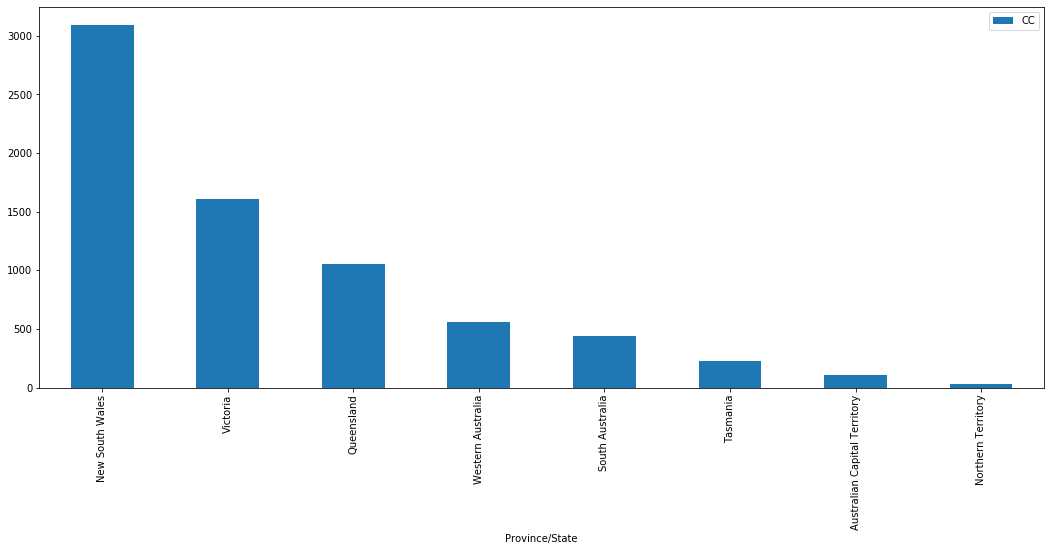

In [100]:
# Confirm cases in comparison
ausCC = ausCC.sort_values(by='CC', ascending=False)
ausCC.plot.bar(x='Province/State', y='CC', figsize=(18,7))

# International centrality

In [101]:
covid_cases1, allRoutes = covid_data.getData(bin_region_column='state')

In [102]:
# This will combine the Country and the state
allRoutesC = allRoutes.copy()
allRoutesC['Depart'] = allRoutes['DepartProvince/State'] + '-' + allRoutes['DepartCountry/Region']
allRoutesC['Arrival'] = allRoutes['ArrivalProvince/State'] + '-' + allRoutes['ArrivalCountry/Region']

# removes the unwanted 'none' strings when entries don't have states/provinces
allRoutesC['Depart'] = allRoutesC['Depart'].map(lambda x: x.lstrip('-none'))
allRoutesC['Arrival'] = allRoutesC['Arrival'].map(lambda x: x.lstrip('-none'))

allRoutesC

,DepartProvince/State,DepartCountry/Region,ArrivalProvince/State,ArrivalCountry/Region,NumberOfRoutes,Depart,Arrival
0,Alabama,US,Alabama,US,2,Alabama-US,Alabama-US
1,Alabama,US,Arizona,US,1,Alabama-US,Arizona-US
2,Alabama,US,Arkansas,US,1,Alabama-US,Arkansas-US
3,Alabama,US,California,US,1,Alabama-US,California-US
4,Alabama,US,Colorado,US,2,Alabama-US,Colorado-US
...,...,...,...,...,...,...,...
9979,none,Zimbabwe,none,Kenya,2,Zimbabwe,Kenya
9980,none,Zimbabwe,none,South Africa,32,Zimbabwe,South Africa
9981,none,Zimbabwe,none,Tanzania,1,Zimbabwe,Tanzania
9982,none,Zimbabwe,none,Zambia,5,Zimbabwe,Zambia


# GlobalMapFlights

In [103]:
# Renders the global map - estimated 10 minutes execution time
GlobalMapFlights, GlobalGraphFlights = renderMap(allRoutesC, covid_cases1['confirmed'], 
                                                 latest_date, (0,0), 1, showOpacity=True, scale=0.0001)

In [104]:
allRoutesC = allRoutesC.loc[allRoutesC['Depart'] != allRoutesC['Arrival']]
allRoutesC.sort_values(by='NumberOfRoutes', ascending=False)

,DepartProvince/State,DepartCountry/Region,ArrivalProvince/State,ArrivalCountry/Region,NumberOfRoutes,Depart,Arrival
9857,none,United Kingdom,none,Spain,1412,United Kingdom,Spain
6295,none,Germany,none,Spain,1342,Germany,Spain
9008,none,Spain,none,United Kingdom,1242,Spain,United Kingdom
8958,none,Spain,none,Germany,1136,Spain,Germany
6304,none,Germany,none,Turkey,683,Germany,Turkey
...,...,...,...,...,...,...,...
2367,Mississippi,US,Missouri,US,1,Mississippi-US,Missouri-US
2363,Mississippi,US,Kentucky,US,1,Mississippi-US,Kentucky-US
2362,Mississippi,US,Indiana,US,1,Mississippi-US,Indiana-US
2358,Mississippi,US,Curacao,Netherlands,1,Mississippi-US,Curacao-Netherlands


In [105]:
# Converts results from above into a pandas dataframe
def dictToDataframeGlobal(degrees):
    dfdegrees = pd.DataFrame.from_dict(degrees, orient='index', columns=['Degrees'])
    dfdegrees.reset_index(level=0, inplace=True) # key indexs to seperate column
    dfdegrees = dfdegrees.sort_values(by='Degrees', ascending=False) # sort by degrees
    dfdegrees = dfdegrees.reset_index(drop=True) # fix indexing
    return dfdegrees

In [106]:
# Calculate closeness centrality
globalcloseness = nx.closeness_centrality(GlobalGraphFlights, distance='weight')
globalcloseness = dictToDataframeGlobal(globalcloseness).head(20)
globalcloseness

,index,Degrees
0,United Kingdom,0.000152
1,Germany,0.000149
2,France,0.000148
3,New York-US,0.000146
4,Spain,0.000142
5,Turkey,0.000140
6,Netherlands,0.000140
7,Florida-US,0.000139
8,United Arab Emirates,0.000138
9,Italy,0.000138


## Closeness Centrality
The closeness shows how close a node is to the rest of the network. This will show the major flight hubs in the network which are more likely to get infected early on.

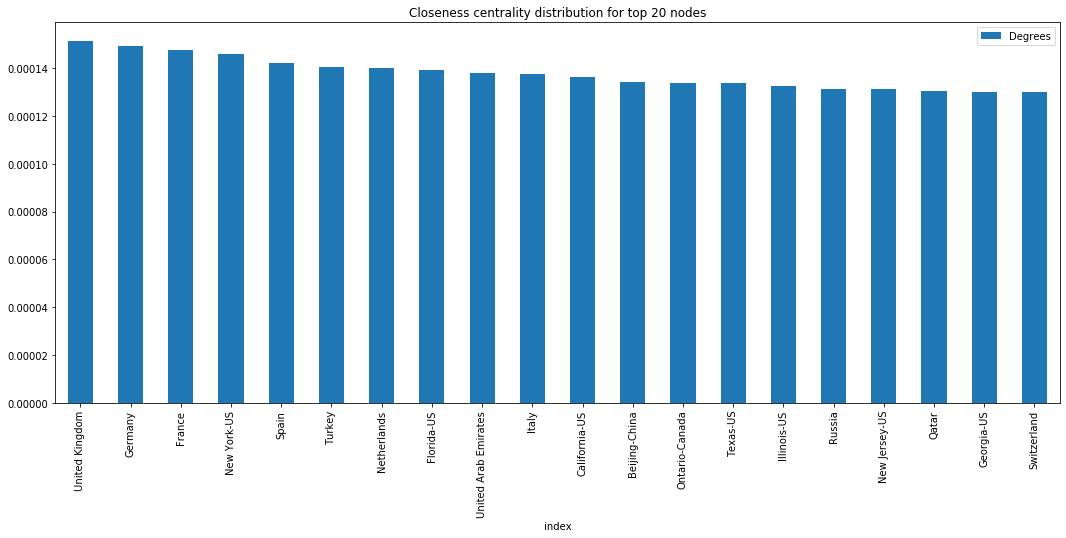

In [107]:
# Show bar graph for betweenness
title = 'Closeness centrality distribution for top 20 nodes'
globalcloseness.plot.bar(x='index', y='Degrees', figsize=(18,7), title=title)

## Betweenness Centrality
Shows the bridges to clusters. These places are highly likely to spread the infection to large areas of the network.

In [108]:
# Calculates the betweenness centrality
betweenness = nx.betweenness_centrality(GlobalGraphFlights, weight='weight')
dfbetweenness = dictToDataframeGlobal(betweenness).head(20)
dfbetweenness

,index,Degrees
0,United Kingdom,0.116096
1,Florida-US,0.104615
2,France,0.093584
3,Germany,0.076886
4,California-US,0.058538
5,Turkey,0.054770
6,United Arab Emirates,0.051121
7,New York-US,0.050357
8,Spain,0.040907
9,Beijing-China,0.036739


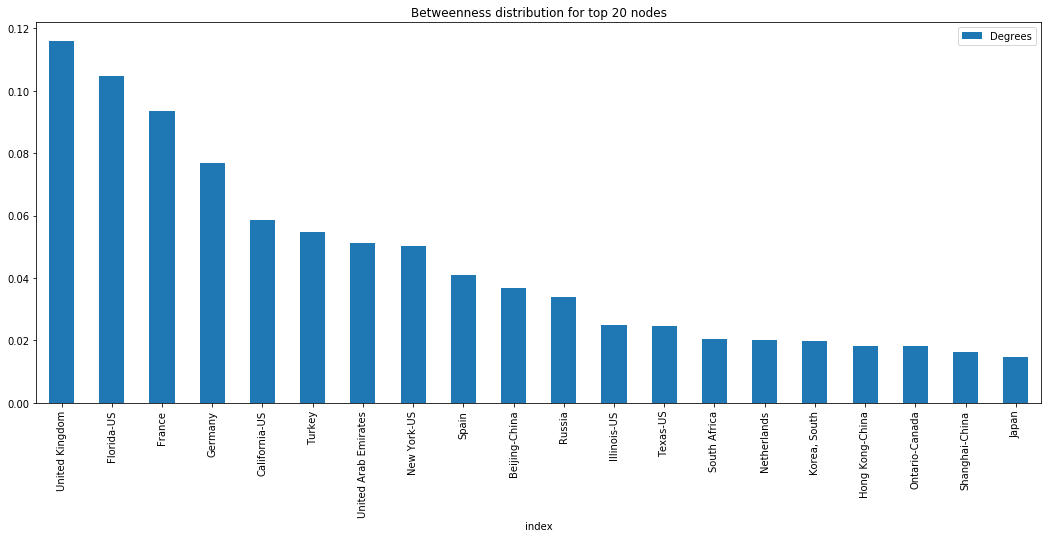

In [109]:
# Show bar graph for betweenness
title = 'Betweenness distribution for top 20 nodes'
dfbetweenness.plot.bar(x='index', y='Degrees', figsize=(18,7), title=title)

The above table and bar graph shows the most bridging airports that connect the world. These are key nodes that bridge between clusters the most.

# Australian Border Closure Timeline
### Australia border from China closed 1 Feb 2020
https://www.pm.gov.au/media/updated-travel-advice-protect-australians-novel-coronavirus
https://www.pm.gov.au/media/extension-travel-ban-protect-australians-coronavirus
https://www.bbc.com/news/world-51338899

### Australia border closure from Iran 1 March 2020
https://www.pm.gov.au/media/update-novel-coronavirus-covid-19-australia
### Australia border closure from South Korea 5 March 2020
https://www.pm.gov.au/media/update-novel-coronavirus-covid-19-australia-0
### Australia social distancing measures 1 18 March 2020
https://www.pm.gov.au/media/update-coronavirus-measures
### Australia border closure from all 20 March 2020
https://www.pm.gov.au/media/border-restrictions
### Australia social distancing measures 2 23 March 2020
https://www.pm.gov.au/media/update-coronavirus-measures-220320
### Australia social distancing measures 3 28 March 2020
Mandatory 14 day self-isolation
https://www.pm.gov.au/media/update-coronavirus-measures-270320

### WA border closure 5 April 2020 Sunday 
https://www.wa.gov.au/organisation/department-of-the-premier-and-cabinet/covid-19-coronavirus-wa-border-closure




## Resources
Resources that were useful.

ipyleaflet:
* https://ipyleaflet.readthedocs.io/en/latest/
* https://github.com/jupyter-widgets/ipyleaflet

Layers Control:
* Documentation: https://ipyleaflet.readthedocs.io/en/latest/api_reference/layers_control.html
* Layers Control naming: https://github.com/jupyter-widgets/ipyleaflet/issues/293